In [30]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('heart_disease.csv')

In [3]:
data.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest_pain_type      1190 non-null   int64  
 3   resting_bp_s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting_blood_sugar  1190 non-null   int64  
 6   resting_ecg          1190 non-null   int64  
 7   max_heart_rate       1190 non-null   int64  
 8   exercise_angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST_slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [5]:
data.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,ST_slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
data.corr()['target']

age                    0.262029
sex                    0.311267
chest_pain_type        0.460127
resting_bp_s           0.121415
cholesterol           -0.198366
fasting_blood_sugar    0.216695
resting_ecg            0.073059
max_heart_rate        -0.413278
exercise_angina        0.481467
oldpeak                0.398385
ST_slope               0.505608
target                 1.000000
Name: target, dtype: float64

In [13]:
x=data.drop(['target'],axis=1)
y=data.target

In [25]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [22]:
x_train_sc.shape

(952, 11)

In [325]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,LeakyReLU,ELU,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping 
from tensorflow.keras.regularizers import L2
from tensorflow.keras.optimizers import Adadelta

In [326]:
model=Sequential()
leaky_relu=LeakyReLU(alpha=0.1)
elu=ELU(alpha=0.1)
l2_reg=L2(l2=0.001)
model.add(Dense(64,activation=leaky_relu,input_dim=11,kernel_regularizer=l2_reg,kernel_initializer='glorot_normal'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(64,activation=leaky_relu,kernel_regularizer=l2_reg))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(64,activation=leaky_relu,kernel_regularizer=l2_reg))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

In [327]:
model.summary()

Model: "sequential_41"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_476 (Dense)           (None, 64)                768       
                                                                 
 dropout_404 (Dropout)       (None, 64)                0         
                                                                 
 batch_normalization_260 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 dense_477 (Dense)           (None, 64)                4160      
                                                                 
 dropout_405 (Dropout)       (None, 64)                0         
                                                                 
 batch_normalization_261 (Ba  (None, 64)               256       
 tchNormalization)                                   

In [328]:
optimizer = Adadelta(learning_rate=1.0, rho=0.95)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])



In [329]:
callback=EarlyStopping(monitor='val_loss',patience=10,min_delta=0.0001)
history=model.fit(x_train_sc,y_train,epochs=100,batch_size=25,validation_split=0.2,callbacks=callback)

Epoch 1/100
31/31 [==============================] - 3s 27ms/step - loss: 0.8025 - accuracy: 0.6741 - val_loss: 0.7282 - val_accuracy: 0.7435
Epoch 2/100
31/31 [==============================] - 1s 17ms/step - loss: 0.6505 - accuracy: 0.7687 - val_loss: 0.6613 - val_accuracy: 0.7906
Epoch 3/100
31/31 [==============================] - 1s 17ms/step - loss: 0.6125 - accuracy: 0.8108 - val_loss: 0.6160 - val_accuracy: 0.8168
Epoch 4/100
31/31 [==============================] - 1s 17ms/step - loss: 0.6049 - accuracy: 0.7963 - val_loss: 0.5906 - val_accuracy: 0.7958
Epoch 5/100
31/31 [==============================] - 1s 19ms/step - loss: 0.5813 - accuracy: 0.8226 - val_loss: 0.5698 - val_accuracy: 0.8168
Epoch 6/100
31/31 [==============================] - 1s 20ms/step - loss: 0.5617 - accuracy: 0.8252 - val_loss: 0.5625 - val_accuracy: 0.8010
Epoch 7/100
31/31 [==============================] - 1s 20ms/step - loss: 0.5497 - accuracy: 0.8213 - val_loss: 0.5543 - val_accuracy: 0.8063
Epoch 

In [332]:
model.layers[3].get_weights()

[array([[-0.11723861,  0.07205695,  0.047369  , ...,  0.07347684,
          0.06062943,  0.0620722 ],
        [ 0.05027599, -0.04648756,  0.03864775, ...,  0.07330024,
          0.13105026, -0.11557138],
        [-0.05618855, -0.04872547, -0.06293043, ..., -0.04795512,
         -0.0831667 ,  0.02792723],
        ...,
        [-0.07452025,  0.10508732, -0.13480024, ..., -0.04743455,
         -0.00412704,  0.00702811],
        [ 0.03272289,  0.02332204,  0.04716866, ...,  0.06568883,
         -0.05992529, -0.04734921],
        [ 0.09790377, -0.07926713, -0.0853842 , ...,  0.04343031,
          0.05454715,  0.14865679]], dtype=float32),
 array([-0.14853166, -0.0450216 , -0.04574   , -0.09462061, -0.08118527,
         0.02359872,  0.00059538,  0.00624782, -0.07277097, -0.0541633 ,
        -0.17558935, -0.06887315,  0.06506895, -0.04304485, -0.07884756,
        -0.14965916, -0.05803133, -0.05809188,  0.0361535 , -0.0680133 ,
        -0.10948492, -0.0772627 , -0.0505894 , -0.05436832, -0.055

In [333]:
y_log=model.predict(x_test_sc)

8/8 [==============================] - 0s 4ms/step


In [334]:
y_pred=np.where(y_log>0.5,1,0)

In [335]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)


0.8949579831932774

In [336]:
history.history

{'loss': [0.8025431036949158,
  0.6505135893821716,
  0.6125103235244751,
  0.604932963848114,
  0.5812599062919617,
  0.561732828617096,
  0.5496765375137329,
  0.5620261430740356,
  0.5382939577102661,
  0.5384074449539185,
  0.5537917017936707,
  0.5376493334770203,
  0.524904727935791,
  0.527719259262085,
  0.5213875770568848,
  0.4972293972969055,
  0.49508389830589294,
  0.49966752529144287,
  0.4794659912586212,
  0.48368990421295166,
  0.4842495322227478,
  0.4457657039165497,
  0.47844648361206055,
  0.5078709125518799,
  0.4584074020385742,
  0.4650638997554779,
  0.46941083669662476,
  0.4755406081676483,
  0.47122275829315186,
  0.4284454882144928,
  0.46085324883461,
  0.43861594796180725,
  0.4319661855697632,
  0.4532480239868164,
  0.44524243474006653,
  0.4274219274520874,
  0.4372386038303375,
  0.4483918845653534,
  0.4149795174598694,
  0.4227622449398041,
  0.4063255786895752,
  0.4308629333972931,
  0.4225412905216217,
  0.4016353487968445,
  0.4190133213996887,


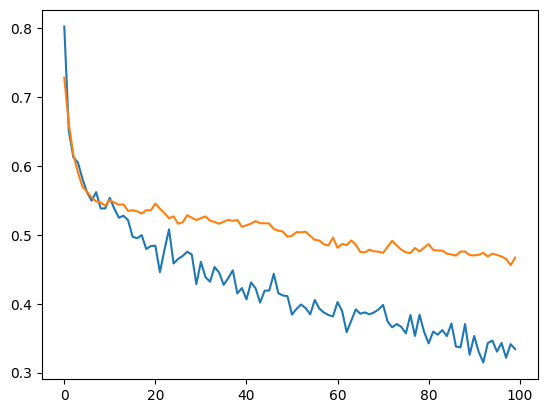

In [337]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

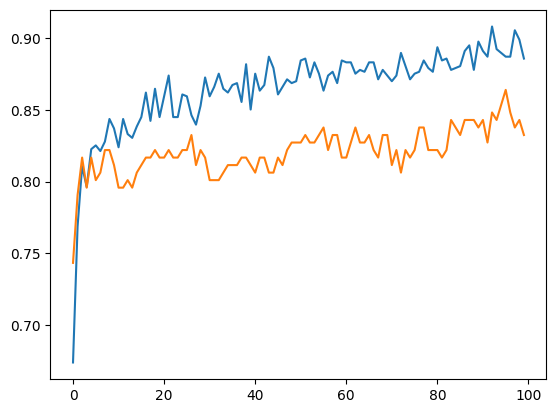

In [338]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])